In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

%matplotlib inline

Using TensorFlow backend.


In [2]:
feature_name = pd.read_csv('Data Cleaning/first_60_features.csv')
feature_1k = pd.read_csv('Data Cleaning/features_25000_26000_R.csv') 

In [3]:
feature_name = feature_name.drop(columns = 'Unnamed: 0')

In [4]:
selected_features = feature_name.values.reshape(1,-1)
selected_features[0]
features = feature_1k[selected_features[0]]
features.tail()

,AATS8p,AATS8v,AATSC0d,AATSC0s,AATSC1c,AATSC1i,AATSC4c,AATSC4i,AATSC6dv,AATSC8i,...,PEOE_VSA2,PEOE_VSA9,SIC5,SaaN,SaaNH,SssSiH2,Xch-7d,nFARing,nG12FHRing,nHBDon
995,1.530795,207.877109,0.584961,0.450277,-0.006698,-0.110481,0.000568,-0.078522,-0.456878,0.010783,...,4.983979,11.957091,0.987500,4.580062,0.000000,0.000000,0.971874,0,1,0
996,1.433559,191.784961,0.606061,0.499358,-0.007908,-0.039948,-0.001057,-0.025058,-0.618865,0.004139,...,0.000000,11.649387,0.987985,0.000000,0.000000,0.000000,1.396058,0,1,0
997,1.340129,169.686489,0.622001,0.239324,-0.001893,0.073891,0.000173,-0.152389,-0.695780,0.128911,...,4.983979,5.516701,0.977017,4.961134,3.369872,0.000000,1.050199,1,1,1
998,1.756651,183.948075,0.615079,0.268178,-0.001132,-0.250174,0.000350,-0.226674,-0.721212,-0.125804,...,4.983979,24.555903,0.973507,4.924767,0.000000,-0.528877,0.947967,1,1,0
999,1.468610,177.473426,0.591368,0.321554,0.000000,0.062837,0.000000,0.028685,-0.753015,-0.195278,...,0.000000,0.000000,0.987985,0.000000,0.000000,0.000000,1.073688,0,1,0


In [5]:
seed = 21899

In [18]:
#features = pd.read_csv('Data Cleaning/selected_data.csv')
#features.head()

,Unnamed: 0,AATS8p,AATS8v,AATSC0d,AATSC0s,AATSC1c,AATSC1i,AATSC4c,AATSC4i,AATSC6dv,...,PEOE_VSA2,PEOE_VSA9,SIC5,SaaN,SaaNH,SssSiH2,Xch-7d,nFARing,nG12FHRing,nHBDon
0,0,1.692047,234.750107,0.574839,0.479809,0.000000,-0.280498,0.000000,-0.105693,0.100130,...,0.0,0.000000,0.987985,13.774789,0.000000,0.000000,1.197844,0,1,0
1,1,1.697847,202.250043,0.609375,0.271559,0.000000,-0.102372,0.000000,0.112876,-0.245837,...,0.0,0.000000,0.981210,4.903642,0.000000,-0.237157,1.099513,1,1,0
2,2,1.519396,180.634859,0.646178,0.295003,-0.003817,-0.018808,0.000335,-0.128555,-1.040159,...,0.0,9.519601,0.975022,0.000000,3.354368,-0.521974,1.460154,1,1,1
3,3,1.996074,183.538805,0.596939,0.253981,0.000000,-0.785079,0.000000,-0.906693,-0.234105,...,0.0,0.000000,0.955425,0.000000,0.000000,-0.114153,0.913246,2,0,0
4,4,1.785965,228.899102,0.625306,0.312798,0.000000,0.081051,0.000000,0.237523,-0.259253,...,0.0,0.000000,0.977719,0.000000,0.000000,0.000000,1.356599,1,1,0


In [19]:
#features = features.drop(columns = 'Unnamed: 0')
#features.head()

,AATS8p,AATS8v,AATSC0d,AATSC0s,AATSC1c,AATSC1i,AATSC4c,AATSC4i,AATSC6dv,AATSC8i,...,PEOE_VSA2,PEOE_VSA9,SIC5,SaaN,SaaNH,SssSiH2,Xch-7d,nFARing,nG12FHRing,nHBDon
0,1.692047,234.750107,0.574839,0.479809,0.000000,-0.280498,0.000000,-0.105693,0.100130,-0.001686,...,0.0,0.000000,0.987985,13.774789,0.000000,0.000000,1.197844,0,1,0
1,1.697847,202.250043,0.609375,0.271559,0.000000,-0.102372,0.000000,0.112876,-0.245837,0.177515,...,0.0,0.000000,0.981210,4.903642,0.000000,-0.237157,1.099513,1,1,0
2,1.519396,180.634859,0.646178,0.295003,-0.003817,-0.018808,0.000335,-0.128555,-1.040159,-0.349845,...,0.0,9.519601,0.975022,0.000000,3.354368,-0.521974,1.460154,1,1,1
3,1.996074,183.538805,0.596939,0.253981,0.000000,-0.785079,0.000000,-0.906693,-0.234105,-0.168336,...,0.0,0.000000,0.955425,0.000000,0.000000,-0.114153,0.913246,2,0,0
4,1.785965,228.899102,0.625306,0.312798,0.000000,0.081051,0.000000,0.237523,-0.259253,-0.026853,...,0.0,0.000000,0.977719,0.000000,0.000000,0.000000,1.356599,1,1,0


In [6]:
fe_list = features.columns.tolist()

In [7]:
data = pd.read_csv('Database/HCEPD_100K.csv')
data = data[25000:26000]

In [8]:
X = features[fe_list].values
Y = data[['pce']].values

In [9]:
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=seed)

In [10]:
# create the scaler from the training data only and keep it for later use
X_train_scaler = StandardScaler().fit(X_train_pn)
# apply the scaler transform to the training data
X_train = X_train_scaler.transform(X_train_pn)

In [11]:
X_test = X_train_scaler.transform(X_test_pn)

In [12]:
def nnmodel():
    # assemble the structure
    model = Sequential()
    model.add(Dropout(0.2))
    model.add(Dense(60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [13]:
# initialize the andom seed as this is used to generate
# the starting weights
np.random.seed(seed)
# create the NN framework
estimator = KerasRegressor(build_fn=nnmodel,
        epochs=200, batch_size=200, verbose=0)
history = estimator.fit(X_train, y_train, validation_split=0.25, epochs=1000, 
        batch_size=400, verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [14]:
print("final MSE for train is %.2f and for validation is %.2f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

final MSE for train is 0.25 and for validation is 0.58


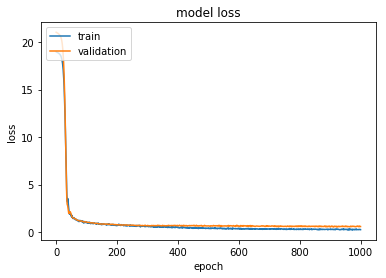

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
test_loss = estimator.model.evaluate(X_test, y_test)
print("test set mse is %.2f" % test_loss)

200/200 [==============================] - 0s 42us/step
test set mse is 0.89


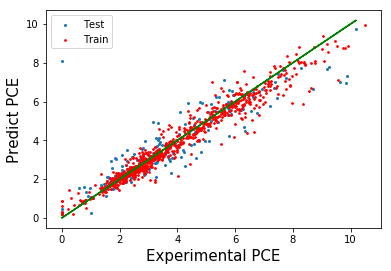

In [17]:
plt.scatter(y_test, estimator.predict(X_test), s=4)
plt.scatter(y_train, estimator.predict(X_train), s=3, c='r')
plt.xlabel('Experimental PCE', size=15)
plt.ylabel('Predict PCE', size=15)
plt.legend(['Test', 'Train'])
plt.plot(y_test, y_test, c='g')

In [18]:
feature112 = pd.read_csv('features_112frag.csv')

In [21]:
data112 = pd.read_csv('112_fragments.csv')
data112.head()

,index,group,label,smiles,PCE_stats,PCE_mean,PCE_std,Global_pop_num,Global_pop_percent,PCE < 8_pop_num,...,PCE > 8_pop_num,PCE > 8_pop_percent,pop_diff,Z,Z_8.0,Z_8.5,Z_9.0,Z_9.5,Z_10.0,Z_10.5
0,62,terminal,f 62,C=C1N(C2=CC=CC=C2O1)C,"{'25%': 1.4897794525169601, 'std': 2.001056154...",2.888581,2.001056,424,0.827220,420,...,4,3.076923,2.255407,2.816744,2.816744,4.311612,1.198000,NaN,NaN,NaN
1,63,terminal,f 63,C=C1N(C)C2=CC=CC=C2C1(C)C,"{'25%': 0.93461738578791276, 'std': 1.53869154...",2.090048,1.538692,2199,4.290229,2195,...,4,3.076923,-1.216475,-0.699465,-0.699465,-0.694377,0.258349,-0.258720,NaN,NaN
2,64,terminal,f 64,C=C1N(C2=CC=CC=C2S1)C,"{'25%': 1.3221597699351173, 'std': 1.374290633...",2.267738,1.374291,846,1.650538,842,...,3,2.307692,0.660749,1.261868,1.261868,0.691185,1.705228,2.157016,2.739656,3.150844
3,65,terminal,f 65,CC(C1=CC=CC=C1N2C)(C)C2=CC=C3C(C(C=CC=C4)=C4C3...,"{'25%': 1.1843245291909152, 'std': 0.962142697...",1.952339,0.962143,267,0.520915,267,...,0,0.000000,-0.522249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66,terminal,f 66,O=C(C1=CC=C2N(C)C3=CC=CC=C3S2)C4=C(C1=C(C#N)C#...,"{'25%': 1.3223404252748248, 'std': 1.030409134...",2.120907,1.030409,535,1.043780,535,...,0,0.000000,-1.046455,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
X_t_pn = feature112[fe_list].values
y_t = data112['PCE_mean']

In [39]:
X_t = X_train_scaler.transform(X_t_pn)

In [29]:
t_loss = estimator.model.evaluate(X_t, y_t)

112/112 [==============================] - 0s 62us/step


In [30]:
y_p = estimator.predict(X_t)

In [43]:
data50 = data.head(50)
fe50 = pd.read_csv('Data Cleaning/selected_data.csv')

In [46]:
y_t_2 = data50['pce'].values
X_t_2_pn = fe50[fe_list].values

In [47]:
X_t_2 = X_train_scaler.transform(X_t_2_pn)

In [48]:
t_2_loss = estimator.model.evaluate(X_t_2, y_t_2)

50/50 [==============================] - 0s 244us/step


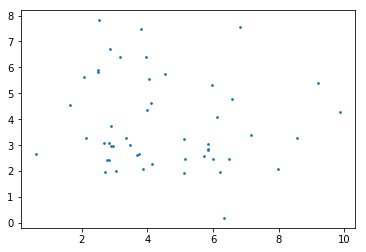

In [51]:
plt.scatter(y_t_2, estimator.predict(X_t_2), s=3)

In [52]:
X_t_2

array([[ 0.36791088,  1.48485063, -1.73611087, ..., -0.94880848,
         0.07088812, -0.46951809],
       [ 0.39730684,  0.09900621,  0.0888119 , ...,  1.05395348,
         0.07088812, -0.46951809],
       [-0.5071299 , -0.82269295,  2.03352604, ...,  1.05395348,
         0.07088812,  1.77967035],
       ...,
       [-0.73483899, -0.54666163, -0.8626954 , ...,  1.05395348,
         0.07088812, -0.46951809],
       [ 1.69165636,  1.19590135,  1.54651636, ...,  1.05395348,
         0.07088812, -0.46951809],
       [-0.62367321, -0.85611918,  0.7559854 , ...,  1.05395348,
         0.07088812, -0.46951809]])

In [53]:
X_test

array([[-1.04577406, -0.59387579,  0.350166  , ..., -0.94880848,
         0.07088812,  1.77967035],
       [ 1.34230159,  0.93993071,  0.82272352, ...,  1.05395348,
         0.07088812, -0.46951809],
       [ 0.2315508 ,  0.68375884, -1.32804525, ..., -0.94880848,
         0.07088812, -0.46951809],
       ...,
       [ 0.05675782,  0.91609099,  0.76768013, ..., -0.94880848,
         0.07088812, -0.46951809],
       [ 1.32065071,  1.21591966, -1.73611088, ..., -0.94880848,
         0.07088812, -0.46951809],
       [ 4.40003113,  2.50544261, -0.21962573, ...,  1.05395348,
         0.07088812, -0.46951809]])